## Data Description

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

See Kaggle page for more info: https://www.kaggle.com/shivamb/netflix-shows


Load this data into `pandas` and use `index_col='show_id'`


In [42]:
# Write code to load data below
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
file_path = "/Users/mo/Desktop/Desktop/Work/Github/Data_Science/Data/netflix_titles.csv"
netflix = pd.read_csv(file_path)

In [44]:
index_col ='show_id'


## Section 1: Dataset Overview

Let's get an initial understanding of the data we are working with. Provide answers and code below.

1.  How many rows and columns are in this dataset?
2.  Provide a list of the columns
3.  Print the **first 10 rows** of this dataset
4.  Use `.info()` to understand where there may be null values in the data

In [45]:
# Write code below
#1
netflix.shape

(6234, 12)

In [46]:
#2
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [47]:
#3
netflix.head(n=10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [48]:
#4
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## Section 2:  Data Cleaning

Let's take some steps to improve the data set for analysis purposes.


1.   There are NA/NaN values in `director`, `cast`, and `country`.  Let's replace these with the value `"Unknown"`
2.   Create a new column `is_available_in_usa` which is True if `country` contains the word `United States` and False otherwise.  (Hint: Sometimes `country` contains multiple countries separated by commas.  We want to be able to catch `United States` if it's in this list also.

Make a new column called `duration_bucket`.  This column will bucket the values found in `duration`, similar to how we grouped values in HW1.  Examples of buckets might be `61-90 minutes`, `91-120 minutes`, `120+ minutes`, or `3+ seasons`.  To do this, I recommend creating a function that converts the value in `duration` to the `bucket_name`, then using the `pandas` `.apply()` function to the `duration` column to create a transformed column, which you can then insert into the dataframe.

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html

In [49]:
#1 
# to replace all nan with Unknown
netflix['director'].fillna('Unknown', inplace =True)
netflix['cast'].fillna('Unknown', inplace =True)
netflix['country'].fillna('Unknown', inplace =True)

In [50]:
# to check if "nan" is replaced with "Unknown"
netflix.loc[:,['country','cast', 'country']]

,country,cast,country
0,"United States, India, South Korea, China","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China"
1,United Kingdom,Jandino Asporaat,United Kingdom
2,United States,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States
3,United States,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States
4,United States,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States
...,...,...,...
6229,United States,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States
6230,United States,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States
6231,Unknown,Unknown,Unknown
6232,United Kingdom,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom


In [51]:
#2
# look for united states using str and contains 
is_available_in_usa = netflix.loc[:, 'country'].str.contains('United States')
is_available_in_usa

# insert new colmun next to countries in index 6 show that index 5 is True
netflix.insert(6, "available_in_usa", is_available_in_usa)

In [52]:
# print to see new column added
netflix

,show_id,type,title,director,cast,country,available_in_usa,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",True,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,False,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,True,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,True,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,True,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,True,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,True,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,Unknown,False,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,False,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


## Section 3: Data Questions

Explore the data set to answer the questions below.  In addition to providing the answer, please provide the code you used to answer each question.

1.   What % of Netflix content is available in the USA?  You can calculate the numerator and denominator separately.  (Hint: Use the new column you created in Section 1)
2.   List all the **movies** directed by **M. Night Shyamalan** that are available on Netflix.
3.   Which **Japanese** **TV Shows** released in **2006** are available on Netflix?
4.   How many **movies** and how many **TV shows** (reported separately) did Netflix add in the **month of July 2019**?
5.   List the Netflix content (movies/TV shows) about the FBI (`description` contains "FBI") chronologically by release year (most recent first)


What % of content on Netflix is added in the same year as it is released? Does this differ by movie vs TV show?




In [53]:
#1
# used value_counts to get false and true values, then divided it with of the total available_in_usa, then multiply with 100
usa_percentages = (netflix.available_in_usa.value_counts() / netflix.available_in_usa.count() ) * 100
usa_percentages

False    58.13282
True     41.86718
Name: available_in_usa, dtype: float64

In [54]:
#2 to create a condition statement for director "M. Night Shyamalan"
is_director = netflix.loc[:, 'director'].str.contains('M. Night Shyamalan')
is_director.value_counts()

False    6233
True        1
Name: director, dtype: int64

In [55]:
# print the condition statement of only true variable
netflix[is_director].head()

,show_id,type,title,director,cast,country,available_in_usa,date_added,release_year,rating,duration,listed_in,description
3040,70044688,Movie,Lady in the Water,M. Night Shyamalan,"Paul Giamatti, Bryce Dallas Howard, Jeffrey Wr...",United States,True,"July 1, 2019",2006,PG-13,110 min,"Sci-Fi & Fantasy, Thrillers",When an apartment building manager discovers a...


In [56]:
#3
# create 3 variables to use condition statements for results on specify resutls
is_jp_movies = netflix.loc[:, 'country'].str.contains('Japan') 
is_2006 = netflix.loc[:, 'release_year'] == 2006 
is_tvshow = netflix.loc[:, 'type'].str.contains("TV Show")
#jp_movies.value_counts()

netflix[is_jp_movies & is_2006 & is_tvshow]

,show_id,type,title,director,cast,country,available_in_usa,date_added,release_year,rating,duration,listed_in,description
721,70204970,TV Show,DEATH NOTE,Unknown,"Kappei Yamaguchi, Alessandro Juliani, Mamoru M...",Japan,False,"October 15, 2016",2006,TV-14,1 Season,"Anime Series, Crime TV Shows, International TV...",When a Japanese high schooler comes into posse...
5566,70205014,TV Show,Ouran High School Host Club,Takuya Igarashi,"Maaya Sakamoto, Monica Rial, Vic Mignogna, Luc...",Japan,False,"April 1, 2017",2006,TV-14,1 Season,"Anime Series, Romantic TV Shows, Teen TV Shows",New student Haruhi stumbles on the Ouran High ...
5724,70204957,TV Show,Bleach,Unknown,"Masakazu Morita, Fumiko Orikasa, Yuki Matsuoka...",Japan,False,"November 3, 2018",2006,TV-14,3 Seasons,"Anime Series, International TV Shows",After teenager Ichigo Kurosaki acquires superp...


In [57]:
#4
# create 3 variable to solve two results
is_movies = netflix.loc[:, 'type'].str.contains("Movie")
is_tvshow = netflix.loc[:, 'type'].str.contains("TV Show")
is_jul_19 = netflix.loc[:, 'date_added'].str.contains("July") & netflix.loc[:, 'date_added'].str.contains("2019")


In [58]:
# to show total of movies and TV shows in july 2019 adedd
is_jul_19.value_counts()

False    6048
True      186
Name: date_added, dtype: int64

In [59]:
# create a condition statement variable for movies and tv show sepretaly with july 2019
july_movies = netflix[is_jul_19 & is_movies]
july_tv_shows = netflix[is_jul_19 & is_tvshow]

In [60]:
# prints all the tv shows that were added in july 2019
july_tv_shows

,show_id,type,title,director,cast,country,available_in_usa,date_added,release_year,rating,duration,listed_in,description
2769,81088333,TV Show,Krishna Balram,Unknown,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,False,"July 8, 2019",2019,TV-Y7-FV,1 Season,Kids' TV,"From playing pranks to destroying demons, Lord..."
2790,81078217,TV Show,In The Dark,Unknown,"Perry Mattfeld, Brooke Markham, Casey Deidrick...",United States,True,"July 5, 2019",2019,TV-14,1 Season,"Crime TV Shows, TV Dramas",A blind woman with vices finds herself in the ...
2792,81108281,TV Show,The Legend of White Snake,Unknown,"Yu Menglong, Ju Jingyi, Pei Zitian, Xiao Yan, ...",Unknown,False,"July 5, 2019",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In this new take on a classic tale, an ancient..."
2801,80236408,TV Show,Bangkok Love Stories: Innocence,Unknown,"Nida Patcharaveerapong, Nicole Theriault, Natt...",Unknown,False,"July 31, 2019",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",From a teenage parkour enthusiast to a bawdy r...
2808,81151899,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,False,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5966,80141270,TV Show,Bonus Family,Unknown,"Vera Vitali, Erik Johansson, Fredrik Hallgren,...",Sweden,False,"July 12, 2019",2019,TV-MA,3 Seasons,"International TV Shows, TV Dramas","A new couple, their exes and their children na..."
5967,80224279,TV Show,"Nightmare Tenants, Slum Landlords",Unknown,Wendi Peters,Unknown,False,"July 12, 2019",2016,TV-MA,2 Seasons,"British TV Shows, International TV Shows, Real...",The ongoing housing crisis in Britain has led ...
5971,81064394,TV Show,Hatchimals | Adventures in Hatchtopia,Unknown,"Sam Vincent, Kira Tozer, Andrea Libman",United States,True,"July 1, 2019",2018,TV-Y,2 Seasons,Kids' TV,These fun-loving creatures hatch from their sh...
5972,80142000,TV Show,Tayo the Little Bus,Unknown,"Robyn Slade, Kami Desilets",South Korea,False,"July 1, 2019",2014,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...


In [61]:
# prints all the Movies that were added in july 2019
july_movies

,show_id,type,title,director,cast,country,available_in_usa,date_added,release_year,rating,duration,listed_in,description
2767,81098589,Movie,Aziz Ansari: RIGHT NOW,Spike Jonze,Aziz Ansari,United States,True,"July 9, 2019",2019,TV-MA,65 min,Stand-Up Comedy,"In a comedy special directed by Spike Jonze, A..."
2768,80221446,Movie,Mary Poppins Returns,Rob Marshall,"Emily Blunt, Lin-Manuel Miranda, Ben Whishaw, ...","United States, United Kingdom",True,"July 9, 2019",2018,PG,131 min,"Children & Family Movies, Music & Musicals","In 1930s London, Michael Banks and his three c..."
2772,70189282,Movie,The Iron Lady,Phyllida Lloyd,"Meryl Streep, Jim Broadbent, Alexandra Roach, ...","United Kingdom, France",False,"July 7, 2019",2011,PG-13,105 min,"Dramas, International Movies","Margaret Thatcher, the first female prime mini..."
2781,81039323,Movie,Sicilian Ghost Story,"Fabio Grassadonia, Antonio Piazza","Julia Jedlikowska, Gaetano Fernandez, Corinne ...","Italy, France, Switzerland",False,"July 6, 2019",2017,TV-MA,119 min,"Dramas, International Movies, Thrillers",When officials are slow to investigate a myste...
2791,80223153,Movie,"River, el más grande siempre","Marcelo Altmark, Mariano Mucci, Luis A. Scalella",Unknown,Argentina,False,"July 5, 2019",2019,TV-G,105 min,"Documentaries, International Movies, Sports Mo...",Experience the highlights of Argentine soccer ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086,70084795,Movie,The Forbidden Kingdom,Rob Minkoff,"Jackie Chan, Jet Li, Collin Chou, Liu Yifei, L...","United States, China",True,"July 1, 2019",2008,PG-13,104 min,"Action & Adventure, Sci-Fi & Fantasy",Jackie Chan and Jet Li star in this rousing ad...
3087,60027701,Movie,The In-Laws,Andrew Fleming,"Michael Douglas, Albert Brooks, Robin Tunney, ...","United States, Germany, Canada",True,"July 1, 2019",2003,PG-13,98 min,"Action & Adventure, Comedies",Daredevil secret agent and father of the groom...
3088,70021654,Movie,The Pink Panther,Shawn Levy,"Steve Martin, Kevin Kline, Beyoncé Knowles-Car...","United States, Czech Republic",True,"July 1, 2019",2006,PG,93 min,"Children & Family Movies, Comedies",Bumbling Inspector Clouseau must solve the mur...
3090,81077862,Movie,War Against Women,Hernán Zin,Unknown,"United States, Spain",True,"July 1, 2019",2013,TV-14,61 min,"Documentaries, International Movies","Filmed over three years in 10 countries, this ..."


## Section 4: Exploration



1- Show all the TV shows with more than 2 seasons and it is "TV-14". Show only 4 columns **(title, type, ratings, duration**)

In [62]:
# Write code below
#1
# create a condtion for only TV shows
is_tvshows = netflix.loc[:,'type'] == "TV Show"
#create a condtion to show seasons by specifying plural to only get multiple seasons
is_seasons = netflix.duration.str.contains("Seasons")
# craete a condtion for rating TV-14
is_adult = netflix.rating.str.contains("TV-14")

# add all condtions in one variable 
tv_seasons = netflix[is_tvshows & is_seasons & is_adult].loc[:,['title', 'type', 'rating', 'duration']]

tv_seasons


,title,type,rating,duration
5583,Show Me the Money,TV Show,TV-14,2 Seasons
5585,Haven,TV Show,TV-14,5 Seasons
5592,Reign,TV Show,TV-14,4 Seasons
5593,The Vampire Diaries,TV Show,TV-14,8 Seasons
5594,Gotham,TV Show,TV-14,5 Seasons
...,...,...,...,...
6217,New Girl,TV Show,TV-14,7 Seasons
6221,Terrace House: Boys & Girls in the City,TV Show,TV-14,2 Seasons
6223,Gunslinger Girl,TV Show,TV-14,2 Seasons
6226,La Familia P. Luche,TV Show,TV-14,3 Seasons


What is the highest release_year of Movies in netflix

In [63]:
#2
# created a variable to print only movies
all_movies = netflix[is_movies]
# created a variable to count number of movies by release_year
movies_by_years = all_movies["release_year"].value_counts()

# print the max index in movies_by_years + the value of movies_by_years
print("the Highest release_year in Netflix is " + str(movies_by_years.idxmax()) + " with a total of " + str(movies_by_years.max())+ " Movies")

the Highest release_year in Netflix is 2017 with a total of 682 Movies


Show all of the Comedy TV shows from 2015 to recent in netflix.  



In [64]:
#3
# create 3 variables and use conditions to show specific resutls
is_tvshow = netflix.loc[:, 'type'].str.contains("TV Show")
# Pull all comedies in listed_in. 
is_comedies = netflix.loc[:, 'listed_in'].str.contains("Comedies")
# this is to show only years from 2015 to recent
is_year = netflix.loc[:, "release_year"] >= 2015 
# use boolean logic, all True store them in new variable
all_comedy = netflix[is_tvshow & is_comedies & is_year]
all_comedy


,show_id,type,title,director,cast,country,available_in_usa,date_added,release_year,rating,duration,listed_in,description
26,80244601,TV Show,Castle of Stars,Unknown,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Unknown,False,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
34,80221550,TV Show,Archibald's Next Big Thing,Unknown,"Tony Hale, Rosamund Pike, Jordan Fisher, Chels...",Unknown,False,"September 6, 2019",2019,TV-Y7,1 Season,"Kids' TV, TV Comedies",Happy-go-lucky chicken Archibald may not remem...
54,80113482,TV Show,No Tomorrow,Unknown,"Joshua Sasse, Tori Anderson, Jonathan Langdon,...",United States,True,"September 5, 2017",2016,TV-14,1 Season,"Romantic TV Shows, TV Comedies, TV Dramas",Her straitjacketed life turned topsy-turvy by ...
63,80996949,TV Show,Adam Ruins Everything,Unknown,"Adam Conover, Adam Lustick, Emily Axford",United States,True,"September 30, 2018",2018,TV-14,1 Season,TV Comedies,Education can be fun – and funny. Comedian Ada...
70,80116921,TV Show,We Bare Bears,Unknown,"Eric Edelstein, Demetri Martin, Bobby Moynihan",United States,True,"September 30, 2018",2017,TV-Y7,1 Season,"Kids' TV, TV Comedies","Grizzly, Panda and Ice Bear are three adopted ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,70196145,TV Show,New Girl,Unknown,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,True,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."
6218,80162994,TV Show,Talking Tom and Friends,Unknown,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",False,"April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6227,80005756,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,False,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6229,80000063,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,True,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [65]:
# this is to show the TV shows under their catagory
all_comedy['listed_in'].value_counts()

Kids' TV, TV Comedies                                                59
TV Comedies                                                          48
International TV Shows, Romantic TV Shows, TV Comedies               39
International TV Shows, TV Comedies, TV Dramas                       25
Stand-Up Comedy & Talk Shows, TV Comedies                            21
International TV Shows, TV Comedies                                  20
TV Comedies, TV Dramas                                               20
British TV Shows, International TV Shows, TV Comedies                12
International TV Shows, Spanish-Language TV Shows, TV Comedies       10
Crime TV Shows, International TV Shows, TV Comedies                   8
British TV Shows, TV Comedies                                         7
International TV Shows, Korean TV Shows, TV Comedies                  6
Romantic TV Shows, TV Comedies, TV Dramas                             6
TV Comedies, TV Dramas, Teen TV Shows                           

# Visualizing TV shows vs Movies over Time (2011-2019)

In [66]:
# get count of title for each year per type
type_release = netflix.groupby(by=['release_year', 'type'], as_index=False)['title'].count()
is_yaers = type_release.release_year > 2010 
release_movie_tv = type_release[is_yaers].sort_values(by='release_year', ascending=True)
release_movie_tv.head()



,release_year,type,title
95,2011,Movie,100
96,2011,TV Show,36
97,2012,Movie,125
98,2012,TV Show,58
99,2013,Movie,177


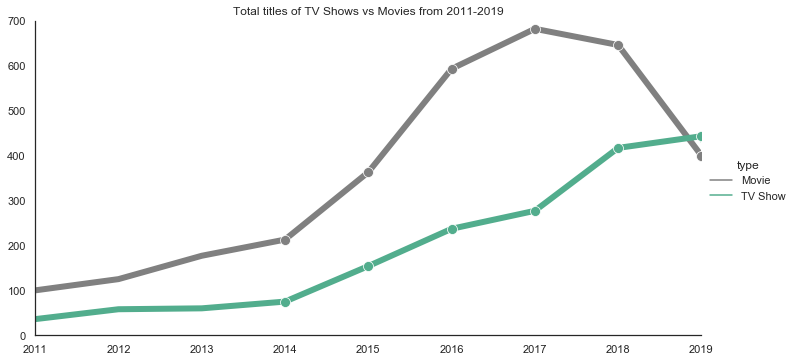

In [68]:
sns.set_theme(style="white")
movies = 'grey'
tv_show = '#52ad8d'
chart = sns.relplot(
    kind='line', 
    data=release_movie_tv, 
    x="release_year", 
    y="title",
    hue="type",
    height = 5,
    aspect = 2,
    linewidth=6,
    legend= True,
    marker='o',
    markersize=10,
    markevery=(3,1),
    palette={
        'Movie': movies,
        'TV Show': tv_show
    },
    
)
sns.set()
chart.set(ylim=(0,700), 
          xlim=(2011,2019), 
          ylabel=None, 
          xlabel=None,
          title = "Total titles of TV Shows vs Movies from 2011-2019")


